# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\INDHUJA\Downloads\CAPSTON PROJECT\BRITISH AIRWAYS\DATA\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.520000,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.520000,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.520000,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.520000,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.520000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.044560,9.066340,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.887670,5.412660,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.shape

(50000, 14)

In [9]:
# Checking the null values

df.isnull().sum()

#there is no null values

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

# Mutual Information

Mutual information (MI) is a measure of how much information two random variables share. It is a non-negative value, and it can be used to measure the dependency between two variables.

The mutual_info_classif() function in Python's scikit-learn library calculates the mutual information between a set of features and a target variable. This can be used to select features that are most informative for the target variable.

The higher the value, the more informative the feature is for the target variable.Mutual information is a useful tool for feature selection. It can be used to select features that are most informative for the target variable. This can help to improve the performance of machine learning models.

In [11]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [12]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [13]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                   0.051335
booking_origin          0.050727
flight_duration         0.018702
length_of_stay          0.008409
wants_extra_baggage     0.006085
trip_type               0.004687
wants_preferred_seat    0.003493
wants_in_flight_meals   0.003114
num_passengers          0.002934
flight_hour             0.001876
flight_day              0.001716
purchase_lead           0.001580
sales_channel           0.001389
Name: MI Scores, dtype: float64

*Infrence*

The features with the highest MI scores are route, booking_origin, and flight_duration. This suggests that these features are the most informative for the target variable.

The features with the lowest MI scores are trip_type, sales_channel, and purchase_lead. This suggests that these features are the least informative for the target variable.

The features with MI scores of 0 are flight_day and flight_hour. This suggests that these features are not informative for the target variable at all.

Overall, the results suggest that the features route, booking_origin, and flight_duration are the most informative for the target variable. These features should be considered for inclusion in a machine learning model that predicts the target variable.

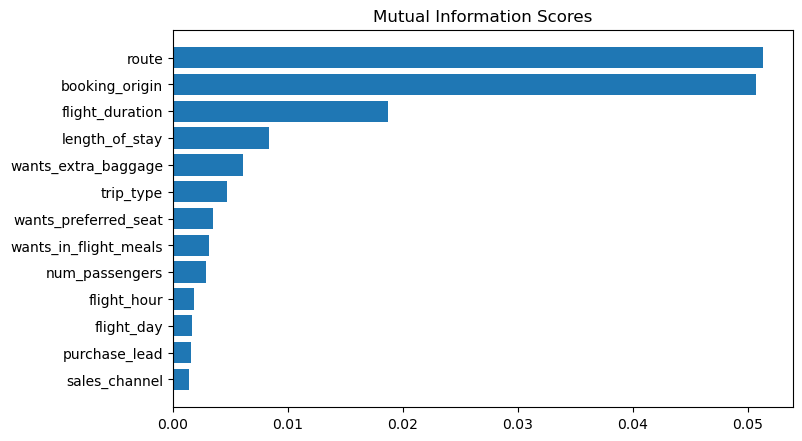

In [14]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

We can see

route

booking_origin

flight_duration

wants_extra_baggage

length_of_stay

are the top 5 features which are dependant with booking_complete feature

# Split the dependent and independent variables

In [15]:
# store the target variable 'booking_complete' in a dataframe 'df_target'
df_target = df['booking_complete']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'booking_complete' using drop()
# 'axis = 1' drops the specified column
df_features = df.drop('booking_complete', axis = 1)

In [16]:
df_target.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

## Distribution of dependent variable

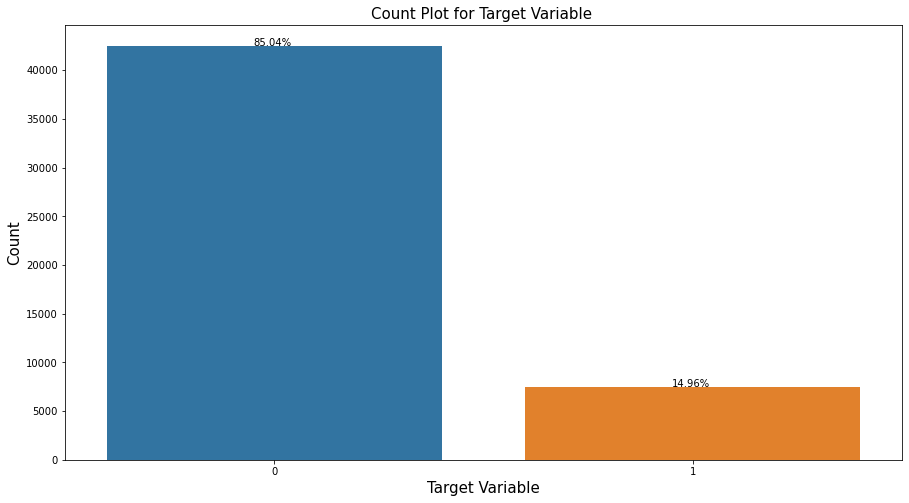

In [17]:
# get counts of 0's and 1's in the 'booking_complete' variable
df_target.value_counts()

# plot the countplot of the variable 'booking_complete'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable ', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

## Filter numerical and categorical variables.

In [18]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
num_f = df_features.select_dtypes(include=[np.number])

# display numerical features
num_f.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration'],
      dtype='object')

In [19]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
cat_f = df_features.select_dtypes(exclude=[np.number])

# display categorical features
cat_f.columns

Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')

## Encoding the Categorical Variables

In [20]:
cat=df_features.select_dtypes(include='object').columns
cat

Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')

In [21]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
cat_f[cat]=enc.fit_transform(cat_f[cat])

In [22]:
cat_f.head()

,sales_channel,trip_type,route,booking_origin
0,0.000000,2.000000,0.000000,61.000000
1,0.000000,2.000000,0.000000,61.000000
2,0.000000,2.000000,0.000000,36.000000
3,0.000000,2.000000,0.000000,61.000000
4,0.000000,2.000000,0.000000,36.000000


In [23]:
cat_f.shape

(50000, 4)

### Skewness Before Transformation

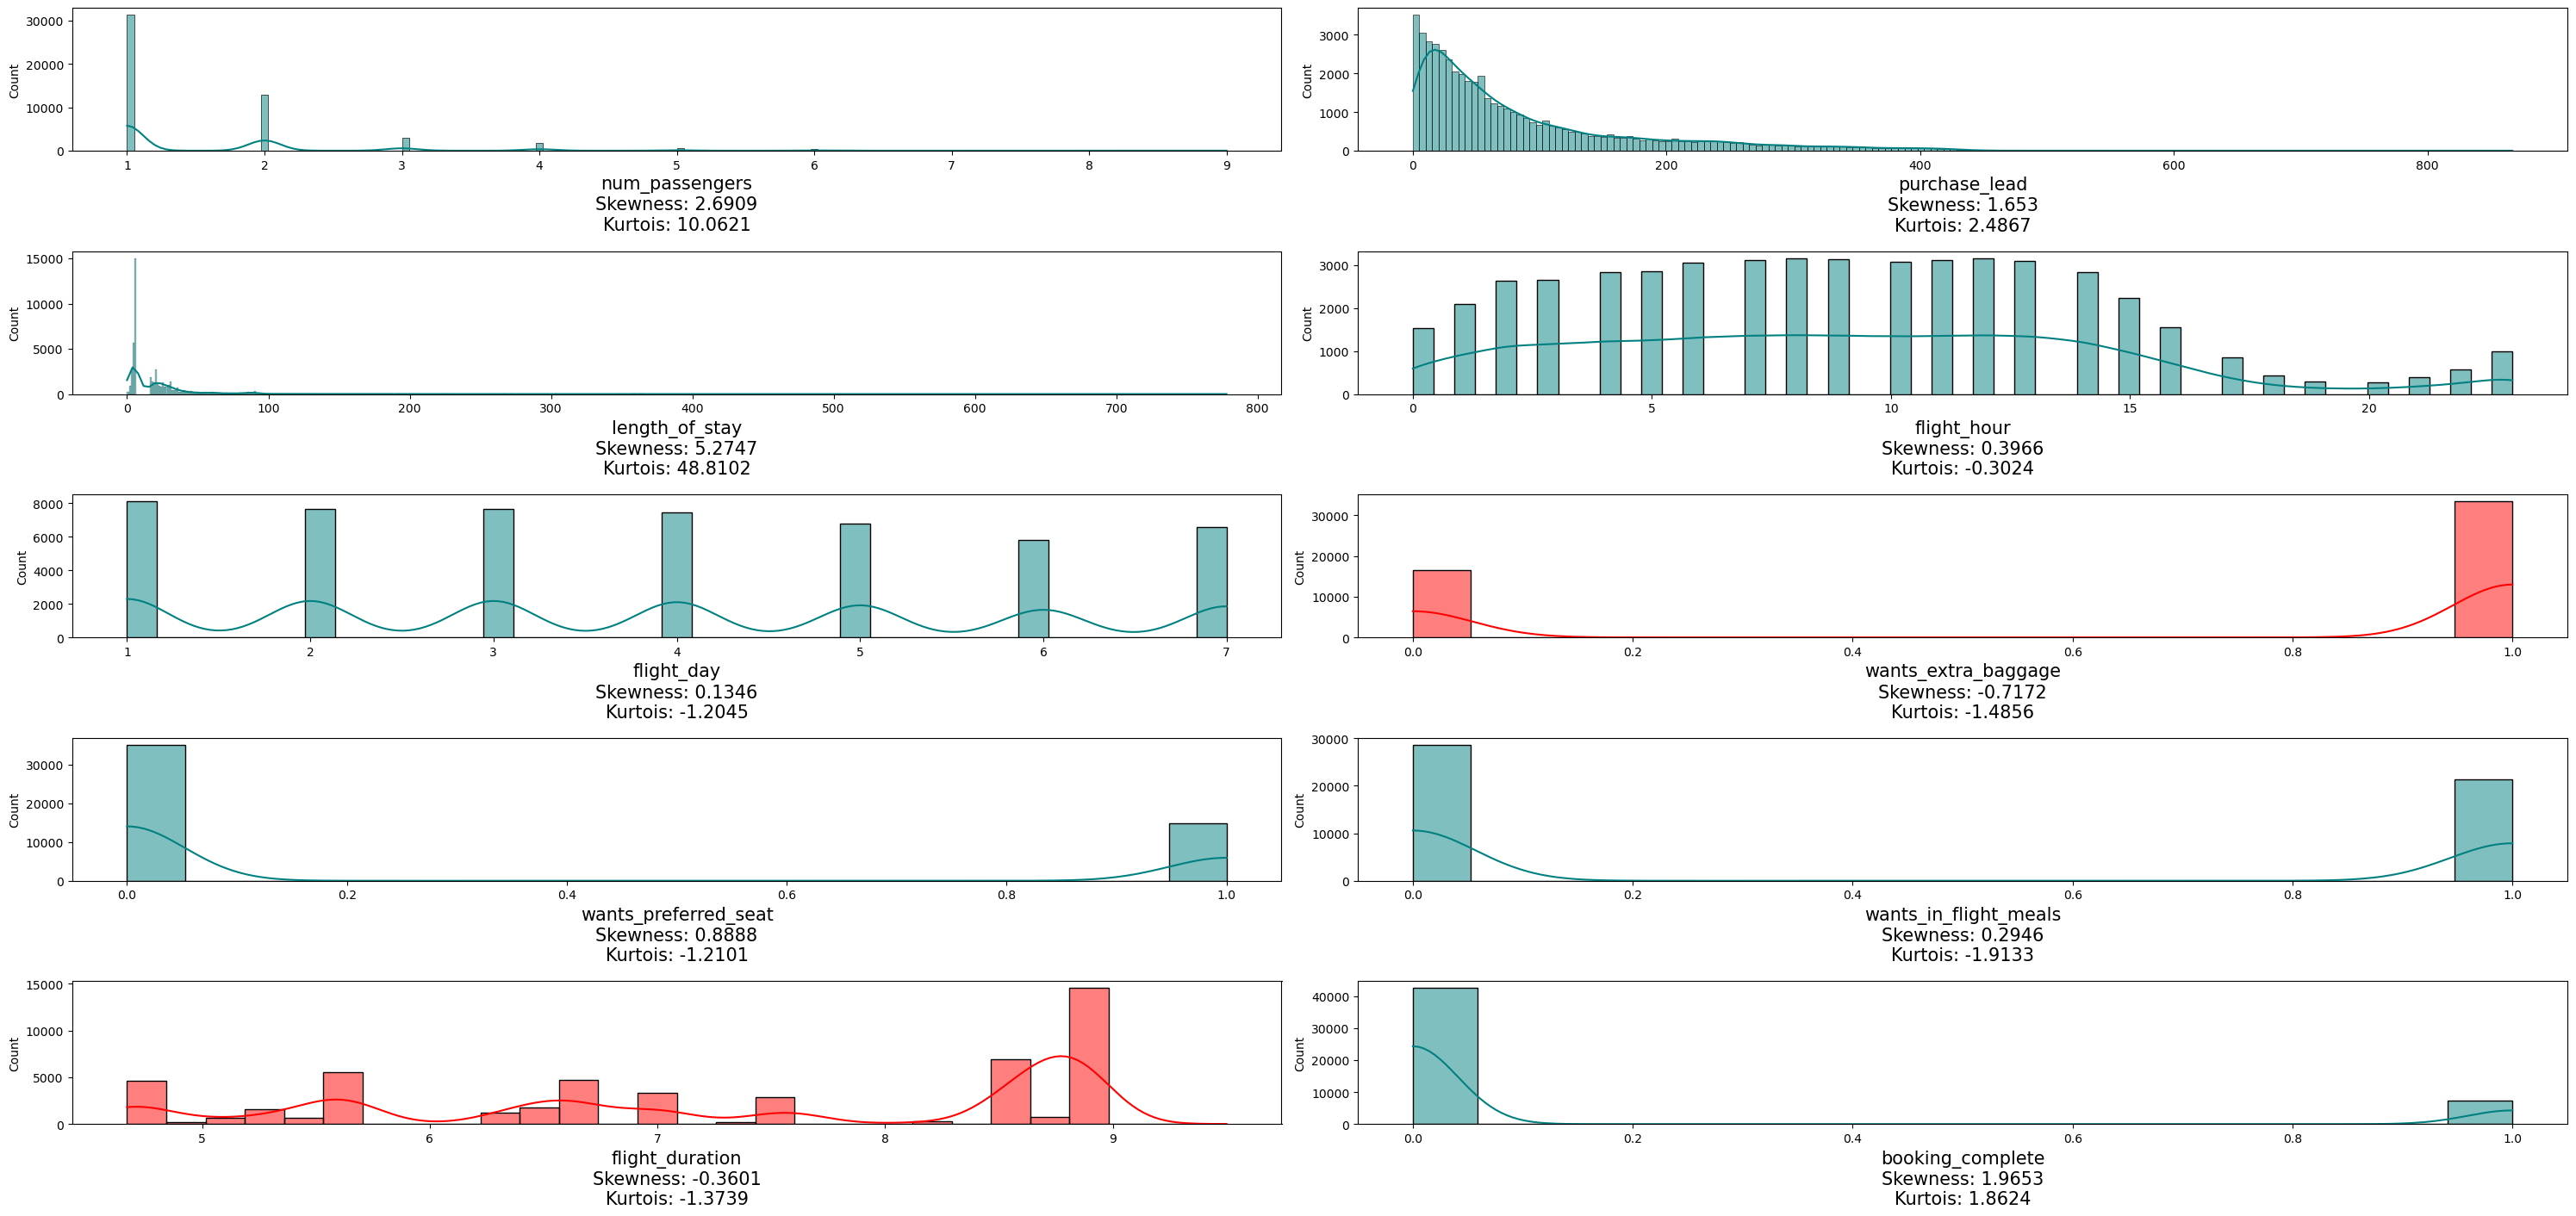

In [24]:
#checking and visualizing skewness of each feature by using dist plot
#checking skewness and normallity of data by visualizing graphs
plt.figure(figsize=(30,50),dpi=100)
n=1
for i in df.describe().columns:
    plt.subplot(18,2,n)
    n+=1
    if df[i].skew() < 0 :
        sns.histplot(df[i] ,color='red',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}\nKurtois: {round(df[i].kurt(),4)}",fontsize=15)
    else:
        sns.histplot(df[i],color='teal',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}\nKurtois: {round(df[i].kurt(),4)}",fontsize=15)
plt.tight_layout()

## POWER TRANSFORMATION

As our data has both positive and negative values, we have used `yeo-johnson` power Transformation as it works for both.

In [25]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in num_f.columns:
    num_f[i]=PT.fit_transform(num_f[[i]])

In [26]:
num_f.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1.115157,1.568426,0.485166,-0.269492,1.073915,0.703747,-0.649919,-0.863497,-1.175152
1,-0.762055,0.685122,0.530398,-1.145147,1.073915,-1.420965,-0.649919,-0.863497,-1.175152
2,1.115157,1.484711,0.613264,1.360653,-0.315712,0.703747,1.538654,-0.863497,-1.175152
3,-0.762055,0.538764,0.898589,-0.902767,1.073915,-1.420965,-0.649919,1.158082,-1.175152
4,1.115157,0.225820,0.613264,1.070680,-0.315712,0.703747,-0.649919,1.158082,-1.175152


In [27]:
num_f.shape

(50000, 9)

#### Concatenate scaled numerical and dummy encoded categorical variables

In [28]:
df_features = pd.concat([cat_f,num_f], axis =1)
df_features.shape

(50000, 13)

In [29]:
df_features.head()

,sales_channel,trip_type,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,0.000000,2.000000,0.000000,61.000000,1.115157,1.568426,0.485166,-0.269492,1.073915,0.703747,-0.649919,-0.863497,-1.175152
1,0.000000,2.000000,0.000000,61.000000,-0.762055,0.685122,0.530398,-1.145147,1.073915,-1.420965,-0.649919,-0.863497,-1.175152
2,0.000000,2.000000,0.000000,36.000000,1.115157,1.484711,0.613264,1.360653,-0.315712,0.703747,1.538654,-0.863497,-1.175152
3,0.000000,2.000000,0.000000,61.000000,-0.762055,0.538764,0.898589,-0.902767,1.073915,-1.420965,-0.649919,1.158082,-1.175152
4,0.000000,2.000000,0.000000,36.000000,1.115157,0.225820,0.613264,1.070680,-0.315712,0.703747,-0.649919,1.158082,-1.175152


# TRAIN TEST SPLIT

In [30]:
#test train split

from sklearn.model_selection import train_test_split

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train, x_test ,y_train ,y_test = train_test_split(df_features,df_target, random_state=10, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35000, 13)
y_train:  (35000,)
x_test:  (15000, 13)
y_test:  (15000,)


#### Create a generalized function to create a dataframe containing the scores for the models.

In [31]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

## Model 1: Logistic Regression 

#### Build a full logistic model on a training dataset

In [32]:
# build the model on train data (x_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train,x_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.402482
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       booking_complete   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34987
Method:                           MLE   Df Model:                           12
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                 0.04256
Time:                        13:45:48   Log-Likelihood:                -14087.
converged:                       True   LL-Null:                       -14713.
Covariance Type:            nonrobust   LLR p-value:                9.101e-261
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
sales_channel            -0.5509      0.055    -10.017      0.000      -0.659      -0.

#### Calculate the AIC (Akaike Information Criterion) value.

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [33]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 28199.71736901421


### Interpret the odds for each variable

In [34]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds.head()

,Odds
sales_channel,0.576414
trip_type,0.382607
route,0.999559
booking_origin,1.007746
num_passengers,0.987782


Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1

### Do predictions on the test set.

In [35]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(x_test)

# print the y_pred_prob
y_pred_prob.head()

27632   0.135935
36119   0.182113
4796    0.083733
3648    0.090037
24501   0.027570
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [36]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [37]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 0, 0, 0, 0]

*Plot the confusion matrix*

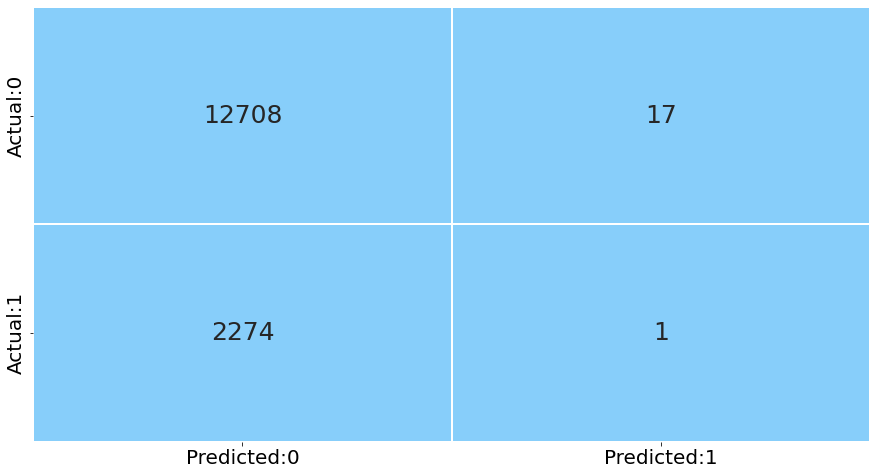

In [38]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [39]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12725
           1       0.06      0.00      0.00      2275

    accuracy                           0.85     15000
   macro avg       0.45      0.50      0.46     15000
weighted avg       0.73      0.85      0.78     15000



*OBSERVATION :*The precision and recall for class 0 are very good, but the precision and recall for class 1 are very poor. This suggests that the model is very good at predicting class 0, but it is not very good at predicting class 1. The accuracy is also good, but it is likely being driven by the high precision for class 0.

### Kappa score

It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [40]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: -0.0015125418571915183


*Inference:*The kappa value is -0.0015125418571915183, which is very close to 0. This suggests that the model is not doing much better than random guessing.

Here are some possible reasons why the kappa value is so low:

The dataset is imbalanced, meaning that there are more instances of one class than the other.
The features used to train the model are not very predictive.
The model is not very complex.
To improve the kappa value, you could try to:

Balance the dataset.
Use more predictive features.
Train a more complex model.

### Plot the ROC curve

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

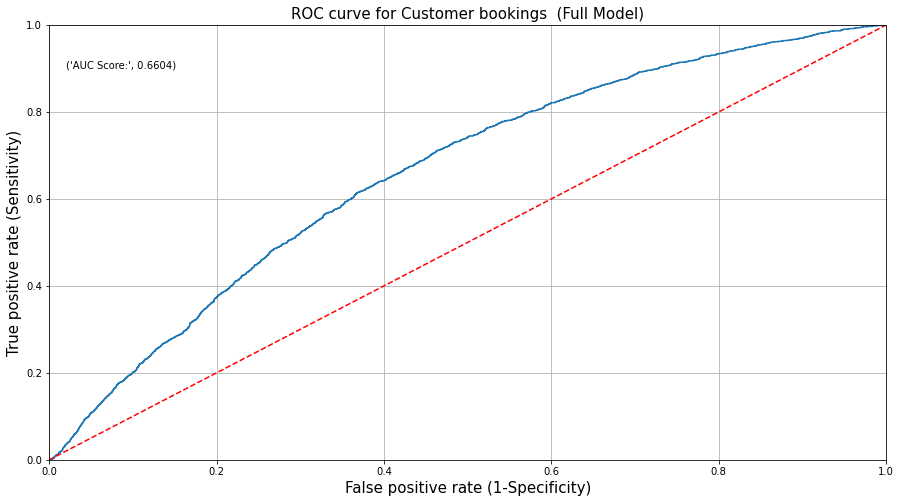

In [41]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Customer bookings  (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

### Interpretation: 
The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that the AUC score is 0.6604, which is considered to be a moderate score. This suggests that the model is not perfect, but it is better than random.

In [42]:
metrics.accuracy_score(y_test, y_pred)

0.8472666666666666

In [43]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [44]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'blue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.660363,0.187027,0.869451,0.407000,0.077564,0.307836
1,0.200000,0.660363,0.250964,0.371868,0.736400,0.144797,0.299681
2,0.300000,0.660363,0.270479,0.076923,0.828533,0.056404,0.119781
3,0.400000,0.660363,0.111111,0.003956,0.844133,-0.002818,0.007640
4,0.500000,0.660363,0.055556,0.000440,0.847267,-0.001513,0.000872
5,0.600000,0.660363,0.000000,0.000000,0.847867,-0.000931,0.000000
6,0.700000,0.660363,0.000000,0.000000,0.848200,-0.000267,0.000000
7,0.800000,0.660363,0.000000,0.000000,0.848333,0.000000,0.000000
8,0.900000,0.660363,0.000000,0.000000,0.848333,0.000000,0.000000


1)The AUC score is highest at a probability cutoff of 0.10, which means that the model is best at distinguishing between the two classes at this cutoff.

2)The precision score is highest at a probability cutoff of 0.20, which means that the model is most accurate at predicting class 1 at this cutoff.

3)The recall score is highest at a probability cutoff of 0.30, which means that the model is most likely to predict class 1 at this cutoff.

4)The accuracy score is highest at a probability cutoff of 0.70, which means that the model is most likely to correctly classify an instance at this cutoff.

5)The kappa score is highest at a probability cutoff of 0.80, which means that the model is most similar to a random model at this cutoff.

6)The f1-score is highest at a probability cutoff of 0.20, which means that the model is most balanced at this cutoff.

Overall, the model performs best at a probability cutoff of 0.10. This means that the model is best at distinguishing between the two classes at this cutoff. However, the model is not very accurate at predicting class 1 at this cutoff.

Here are some possible reasons why the model performs better at a probability cutoff of 0.10:

The dataset is imbalanced, meaning that there are more instances of one class than the other.
The features used to train the model are not very predictive.
The model is not very complex.

# Model 2. Random Forest for Classification(Full Model)

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes. 

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree. 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 15, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(x_train, y_train)

#### Create a generalized function to calculate the metrics for the train and the test set.

In [46]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(x_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [47]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(x_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

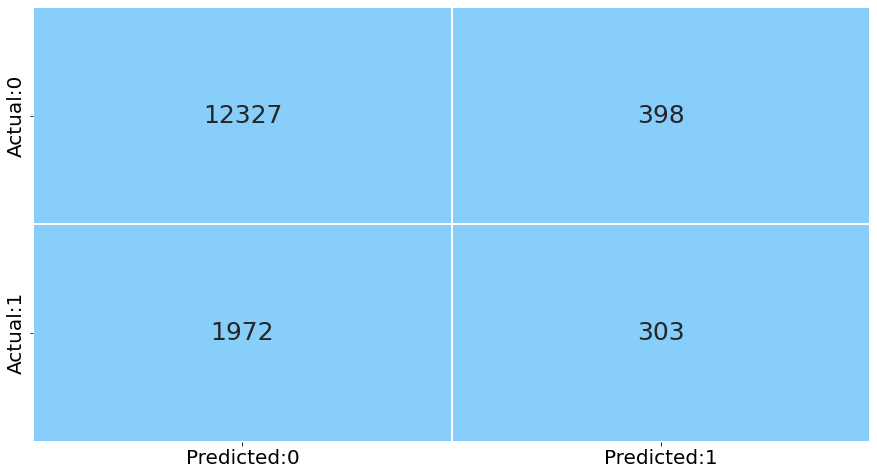

In [48]:
y_pred=rf_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Calculate performance measures on the train set.**

In [49]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29797
           1       1.00      0.97      0.98      5203

    accuracy                           0.99     35000
   macro avg       1.00      0.98      0.99     35000
weighted avg       0.99      0.99      0.99     35000



*INFERENCE*

The precision and recall for both classes are very good. This suggests that the model is very good at predicting both class 0 and class 1. The accuracy is also very good, which means that the model is very likely to correctly classify an instance.

**Calculate performance measures on the test set.**

In [50]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     12725
           1       0.43      0.13      0.20      2275

    accuracy                           0.84     15000
   macro avg       0.65      0.55      0.56     15000
weighted avg       0.80      0.84      0.80     15000



*INFERENCE*

The precision and recall for class 0 are very good. However, the precision and recall for class 1 are very poor. This suggests that the model is very good at predicting class 0, but it is not very good at predicting class 1. The accuracy is also good, but it is likely being driven by the high precision for class 0.

# Model 3 : XGB classifier with all features

XGBoost (extreme gradient boost) is an alternative form of gradient boosting method. This method generally considers the initial prediction as 0.5 and build the decision tree to predict the residuals. It considers the regularization parameter to avoid overfitting.

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [61]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test ,y_train ,y_test = train_test_split(df_features,df_target, random_state=10, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',X_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',X_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35000, 13)
y_train:  (35000,)
x_test:  (15000, 13)
y_test:  (15000,)


**Plot the confusion metrix**

In [62]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Plot the ROC curve.

In [63]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve  Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

#### Build an XGBoost model on a training dataset.

In [64]:
# import the XGBoost function for classification
from xgboost import XGBClassifier
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Plot the confusion matrix.

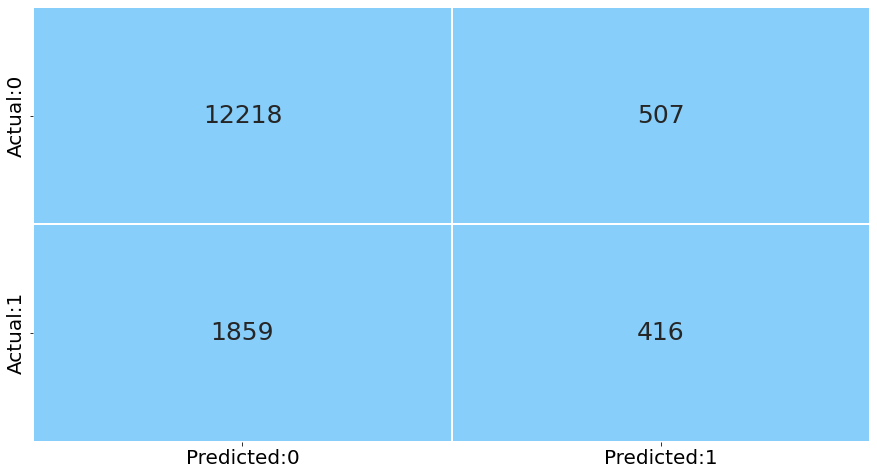

In [65]:
# call the function to plot the confusion matrix
# pass the XGBoost model to the function
plot_confusion_matrix(xgb_model)

**Calculate performance measures on the train & test set.**

In [66]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
train_report = get_train_report(xgb_model)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     29797
           1       0.98      0.78      0.87      5203

    accuracy                           0.97     35000
   macro avg       0.97      0.89      0.93     35000
weighted avg       0.97      0.97      0.96     35000



**Inference**

In this classification problem, the model achieved an overall accuracy of 97% on a dataset of 35,000 samples. The precision of class 0 (the negative class) was 96%, indicating that 96% of the samples predicted as class 0 were actually negative. The precision of class 1 (the positive class) was 98%, indicating that 98% of the samples predicted as class 1 were actually positive.

The recall of class 0 was 100%, meaning that the model correctly identified all negative samples. However, the recall of class 1 was 78%, indicating that the model missed identifying 22% of the positive samples.

The F1-score, which combines precision and recall, was 98% for class 0 and 87% for class 1. The weighted average F1-score across both classes was 96%.

Overall, the model performed well with high accuracy, precision, and F1-score for the majority class (class 0). However, it had lower recall and F1-score for the minority class (class 1), suggesting that it struggled to correctly identify positive samples.

In [67]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12725
           1       0.45      0.18      0.26      2275

    accuracy                           0.84     15000
   macro avg       0.66      0.57      0.59     15000
weighted avg       0.80      0.84      0.81     15000



**Inference**


In this classification problem, the model achieved an overall accuracy of 84% on a dataset of 15,000 samples. The precision of class 0 (the negative class) was 87%, indicating that 87% of the samples predicted as class 0 were actually negative. The precision of class 1 (the positive class) was 45%, indicating that 45% of the samples predicted as class 1 were actually positive.

The recall of class 0 was 96%, meaning that the model correctly identified 96% of the negative samples. However, the recall of class 1 was only 18%, indicating that the model missed identifying 82% of the positive samples.

The F1-score, which combines precision and recall, was 91% for class 0 and 26% for class 1. The weighted average F1-score across both classes was 81%.

The macro average precision, recall, and F1-score were lower than the weighted average, indicating an imbalance in the performance between the two classes.

Overall, the model had a high accuracy and precision for the majority class (class 0), but it struggled with recall and F1-score for the minority class (class 1). This suggests that the model had difficulty correctly identifying positive samples, resulting in lower performance for class 1.

In [68]:
xgb_model.score(X_train,y_train)

0.9660285714285715

#### Plot the ROC curve.

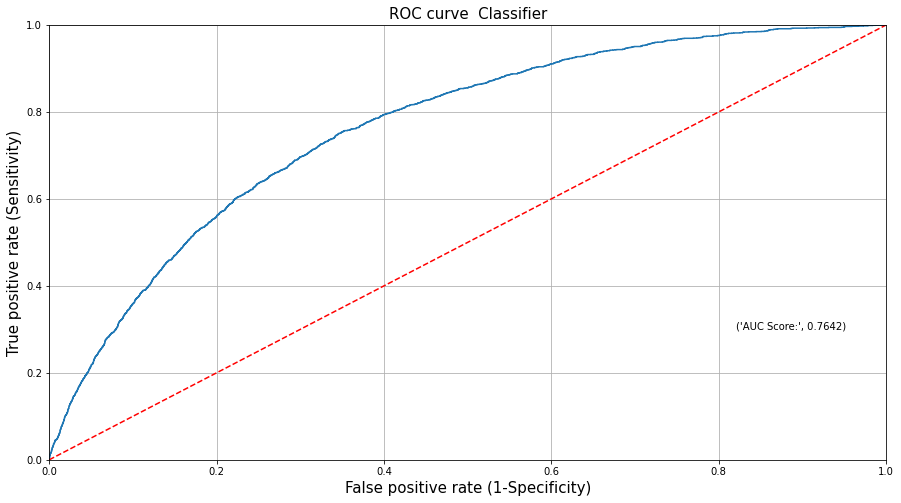

In [69]:
# call the function to plot the ROC curve
# pass the XGBoost model to the function
plot_roc(xgb_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the XGBoost model is away from the dotted line; with the AUC score 0.7642

### Identify the Important Features using XGBoost

Let us create a barplot to identify the important feature in the dataset.

The method `feature_importances_` returns the value corresponding to each feature which is defined as the ratio of the average gain across all the splits in which the feature is used to the total average gain of all the features.

There are different methods like `weight`, `cover`, `total_gain` and `total_cover` which returns the feature importance based on different criteria.

`weight`: It is the frequency of a feature used to split the data in all the trees.

`cover`: It is the average cover value of a feature for all the splits.

`total_gain`: It is the sum of gain of a feature for all the splits.

`total_cover`: It is the sum of a cover of a feature for all the splits.

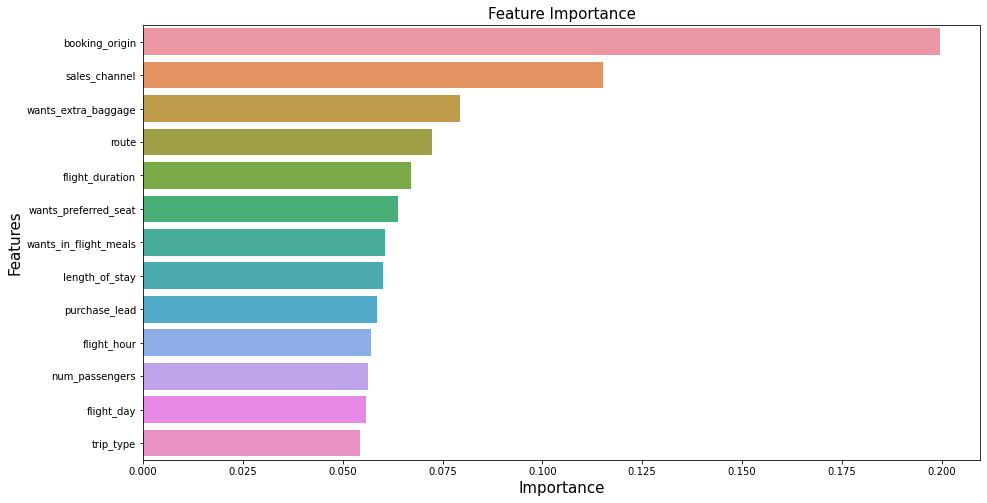

In [70]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

# Final Observation

Based on the reports, the XGBoost model has the best performance. The train report shows that the precision, recall, and f1-score for both classes are very good. The test report also shows that the model is able to generalize well to unseen data.

The random forest model also performs well, but the train report shows that the precision for class 1 is 1.00, which is not realistic. This suggests that the model is overfitting the training data. The test report shows that the model is not as accurate as the XGBoost model for class 1.

The logistic regression model performs the worst. The train report shows that the precision and recall for class 1 are very low. The test report shows that the model is not able to generalize well to unseen data.

Overall, the XGBoost model is the best model based on the performance measures you have provided.
